# Импорт

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import LambdaCallback, ModelCheckpoint

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
import os
import re
!pip install pymorphy2
import pymorphy2
!pip install pymorphy2-dicts-ru
!pip install pymorphy2-dicts


     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 8.2MB 28.1MB/s 
     |████████████████████████████████| 7.1MB 9.2MB/s 


In [ ]:
!python --version

Python 3.6.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Light

In [ ]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

trainText = []
testText = []

trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Рэй Брэдберри) Обучающая_22 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Стругацкие) Обучающая_5 вместе.txt')) 

testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Рэй Брэдберри) Тестовая_8 вместе.txt'))
testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/(Стругацкие) Тестовая_2 вместе.txt'))





In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index +=step
  return xSample

def createSetMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))
  
  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)

In [ ]:
maxWordsCount = 20000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True,
                      split=' ', char_level=False, oov_token='unknown')
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())

In [ ]:
  trainWordIndexes = tokenizer.texts_to_sequences(trainText)
  testWordIndexes = tokenizer.texts_to_sequences(testText)
  xLen = 1000
  step = 100

  xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
  xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)

## Embedding + Dense сеть.


Epoch 1/50
138/138 [==============================] - 5s 39ms/step - loss: 1.0215 - accuracy: 0.6815 - val_loss: 3.0821 - val_accuracy: 0.2928
Epoch 2/50
138/138 [==============================] - 5s 37ms/step - loss: 0.3323 - accuracy: 0.9509 - val_loss: 2.8104 - val_accuracy: 0.2928
Epoch 3/50
138/138 [==============================] - 5s 37ms/step - loss: 0.1747 - accuracy: 0.9852 - val_loss: 1.8187 - val_accuracy: 0.3259
Epoch 4/50
138/138 [==============================] - 5s 37ms/step - loss: 0.0446 - accuracy: 0.9999 - val_loss: 1.3641 - val_accuracy: 0.4866
Epoch 5/50
138/138 [==============================] - 5s 36ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.9097 - val_accuracy: 0.6879
Epoch 6/50
138/138 [==============================] - 5s 37ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.8094 - val_accuracy: 0.7187
Epoch 7/50
138/138 [==============================] - 5s 36ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8017 - val_accuracy: 0.7263

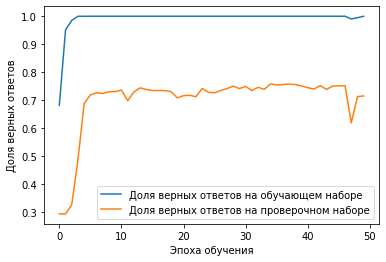

In [ ]:
# Embedding + Dense
modelD = Sequential()
modelD.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelD.add(SpatialDropout1D(0.2))
modelD.add(Flatten())
modelD.add(BatchNormalization())
modelD.add(Dense(200, activation="relu"))
modelD.add(Dropout(0.2))
modelD.add(BatchNormalization())
modelD.add(Dense(6, activation='sigmoid'))

modelD.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelD.fit(xTrain, 
                    yTrain, 
                    epochs=50,
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Embedding + LSTM сеть.

Epoch 1/50
89/89 [==============================] - 9s 106ms/step - loss: 0.9910 - accuracy: 0.7982 - val_loss: 5.2757 - val_accuracy: 0.0781
Epoch 2/50
89/89 [==============================] - 9s 104ms/step - loss: 0.0471 - accuracy: 0.9891 - val_loss: 27.0089 - val_accuracy: 0.0781
Epoch 3/50
89/89 [==============================] - 9s 102ms/step - loss: 0.0304 - accuracy: 0.9939 - val_loss: 42.9507 - val_accuracy: 0.0781
Epoch 4/50
89/89 [==============================] - 9s 103ms/step - loss: 0.0258 - accuracy: 0.9959 - val_loss: 52.5934 - val_accuracy: 0.1954
Epoch 5/50
89/89 [==============================] - 9s 103ms/step - loss: 0.0195 - accuracy: 0.9965 - val_loss: 46.8603 - val_accuracy: 0.2531
Epoch 6/50
89/89 [==============================] - 9s 102ms/step - loss: 0.0310 - accuracy: 0.9958 - val_loss: 13.3663 - val_accuracy: 0.5171
Epoch 7/50
89/89 [==============================] - 9s 102ms/step - loss: 0.0280 - accuracy: 0.9964 - val_loss: 15.9692 - val_accuracy: 0.5361


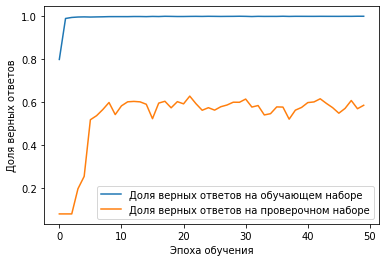

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelLSTM.add(SpatialDropout1D(0.2))
modelLSTM.add(BatchNormalization())
modelLSTM.add(LSTM(4, return_sequences=True))
modelLSTM.add(Dropout(0.4))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Dense(100, activation='relu'))
modelLSTM.add(Dropout(0.4))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Flatten())
modelLSTM.add(Dense(6, activation='softmax'))

modelLSTM.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy',
                  metrics=['accuracy'])
history = modelLSTM.fit(xTrain, yTrain,
                        epochs = 50,
                        batch_size=200,
                        validation_data=(xTest, yTest))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


## Embedding + Conv1D сеть.

Epoch 1/50
89/89 [==============================] - 5s 55ms/step - loss: 0.8669 - accuracy: 0.7014 - val_loss: 3.8410 - val_accuracy: 0.0781
Epoch 2/50
89/89 [==============================] - 5s 53ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 6.1219 - val_accuracy: 0.0781
Epoch 3/50
89/89 [==============================] - 5s 53ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 6.6996 - val_accuracy: 0.1007
Epoch 4/50
89/89 [==============================] - 5s 53ms/step - loss: 6.5549e-04 - accuracy: 0.9997 - val_loss: 8.4284 - val_accuracy: 0.0781
Epoch 5/50
89/89 [==============================] - 5s 53ms/step - loss: 4.0273e-04 - accuracy: 0.9999 - val_loss: 3.1697 - val_accuracy: 0.5047
Epoch 6/50
89/89 [==============================] - 5s 52ms/step - loss: 2.8156e-04 - accuracy: 0.9999 - val_loss: 4.3356 - val_accuracy: 0.4309
Epoch 7/50
89/89 [==============================] - 5s 52ms/step - loss: 5.1839e-04 - accuracy: 0.9999 - val_loss: 3.3367 - val_accuracy: 0.44

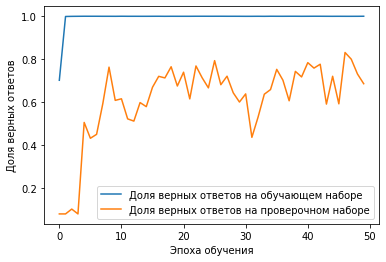

In [ ]:
modelConv = Sequential()
modelConv.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelConv.add(SpatialDropout1D(0.2))
modelConv.add(BatchNormalization())
modelConv.add(Conv1D(20, 5, activation='relu'))
modelConv.add(Conv1D(20, 5, activation='relu'))
modelConv.add(MaxPooling1D(2))
modelConv.add(Dropout(0.2))
modelConv.add(BatchNormalization())
modelConv.add(Flatten())
modelConv.add(Dense(6, activation = 'softmax'))

modelConv.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy',
                  metrics=['accuracy'])
history = modelConv.fit(xTrain, yTrain,
                        epochs = 50,
                        batch_size=200,
                        validation_data=(xTest, yTest))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


## Embedding + сложная сеть из Dense, LSTM и Conv1D.

Epoch 1/50
89/89 [==============================] - 8s 88ms/step - loss: 0.6675 - accuracy: 0.7520 - val_loss: 1.9918 - val_accuracy: 0.2928
Epoch 2/50
89/89 [==============================] - 7s 79ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 2.2373 - val_accuracy: 0.2945
Epoch 3/50
89/89 [==============================] - 7s 80ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 3.6723 - val_accuracy: 0.3067
Epoch 4/50
89/89 [==============================] - 7s 79ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 5.6107 - val_accuracy: 0.3058
Epoch 5/50
89/89 [==============================] - 7s 80ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 4.3615 - val_accuracy: 0.3693
Epoch 6/50
89/89 [==============================] - 7s 80ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 3.6597 - val_accuracy: 0.4106
Epoch 7/50
89/89 [==============================] - 7s 79ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 3.8089 - val_accuracy: 0.4611
Epoch 8/50
89

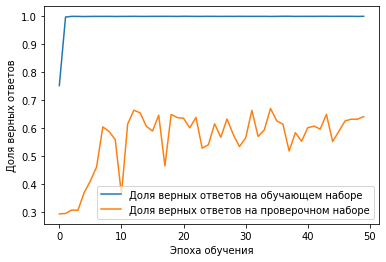

In [ ]:
modelAll = Sequential()
modelAll.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelAll.add(SpatialDropout1D(0.3))
modelAll.add(Conv1D(20, 5, activation='relu'))
modelAll.add(MaxPooling1D(2))
modelAll.add(Dropout(0.2))
modelAll.add(BatchNormalization())
modelAll.add(LSTM(4, return_sequences=True))
modelAll.add(LSTM(4, return_sequences=True))
modelAll.add(Dropout(0.2))
modelAll.add(BatchNormalization())
modelAll.add(Flatten())
modelAll.add(Dense(6, activation='softmax'))

modelAll.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy',
                  metrics=['accuracy'])
history = modelAll.fit(xTrain, yTrain,
                        epochs = 50,
                        batch_size=200,
                        validation_data=(xTest, yTest))
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


# Pro Вариант 1

применил следующие методы:
- заранее очистил текст от знаков препинаний и прочих символов
- применил pyMorphy (здесь, в отличие от художественных текстов, склонения и падежи не важны - важны сами факты симптомов)
- заранее разделил подготовленные тексты на обучающую и тестовую выборки - по 15% от каждой болезни в тестовую выборку

В итоге лучшие результаты получились при:
- Bag of Words - 96%
- Embedding+Conv1D - 91%

Привожу оба примера, так как насчет BagOfWords есть сомнения - это выше, чем результаты по стажировке, которую озвучивал Сергей (93%). 

## Подготовка данных

In [ ]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text
className = ["Аппендицит", 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит',
             'Холецестит', 'Эзофагит', 'Энтерит', 'Язва']
nClasses = len(className)

In [ ]:
wholeText = []
for file_ in os.listdir('/content/drive/My Drive/Colab Notebooks/18. Рекуррентные сети/Dataset'):
  wholeText.append(readText('/content/drive/My Drive/Colab Notebooks/18. Рекуррентные сети/Dataset/'+file_)) 

In [ ]:
wholeText

['Желтуха начало гепатита напоминает грипп: повышение температуры тела головная боль общее недомогание ломота в теле слабость Боли в правом подреберье   высокая температура усталость отсутствие аппетита тошнота рвота боли в животе бледный стул темная моча боли в суставах желтушность кожи и глаз  головная боль; нарушение сна; запоры; тошнота и рвота; общая слабость; зуд и пигментация кожи (редко); желтуха; боли в суставах; тупая боль в районе печени; снижение аппетита,отвращение к пище; повышается температура тела (при тяжелом течении болезни).  высокая температура; общее недомогание, усталость разбитость; головные боли; расстройства желудка тошнота рвота; желтушность кожных покровов; тянущие или приступообразные боли в правом подреберье; увеличение печени, реже – селезенки; светлый цвет экскрементов; темный цвет мочи.  быстрая утомляемость, снижение толерантности к физическим нагрузкам, нарушения сна, депрессии, апатия, периодические расстройства ЖКТ, тяжесть в правом подреберье  повыш

In [ ]:
def clean_text(wholeText):
  # оставляет только текстовые значения
  new_text = []
  for i in wholeText:
    new_text.append(re.sub(r' +',' ', re.sub(r'[^\w\s]', '', i)))
  return new_text

In [ ]:
wholeText_cl = clean_text(wholeText)

In [ ]:
morph = pymorphy2.MorphAnalyzer(lang='ru-old')

/usr/local/lib/python3.6/dist-packages/pymorphy2/analyzer.py:296: UserWarning: Dictionary language (None) doesn't match analyzer language ('ru-old').
  "analyzer language (%r)." % (dictionary.lang, lang)


In [ ]:
# приводим все слова к нормальной форме
wholeText_cl_norm = []
for item in wholeText_cl:
  str_norm = ''
  for word in item.split():
    str_norm += morph.parse(word)[0].normal_form + ' '
  wholeText_cl_norm.append(str_norm)

In [ ]:
trainText = []
testText = []
for s in wholeText_cl_norm:
  tr, tst = train_test_split(s.split(), test_size=0.15, shuffle=True)
  trainText.append(tr)
  testText.append(tst)

maxWordsCount = 500
tokenizer = Tokenizer(num_words=maxWordsCount, lower=True, split=' ', char_level=False,
                      oov_token='unknown')
tokenizer.fit_on_texts(trainText)
items = list(tokenizer.word_index.items())

def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index +=step
  return xSample

def createSetMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))
  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)

In [ ]:
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 50
step = 5

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)

xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

In [ ]:
def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  nClasses = len(wordIndexes) 
  xTest6Classes01 = []               
  xTest6Classes = []                 
  for wI in wordIndexes:             
    sample = (getSetFromIndexes(wI, xLen, step))
    xTest6Classes.append(np.array(sample))       
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) 
  xTest6Classes01 = np.array(xTest6Classes01)                     
  
  return xTest6Classes01, xTest6Classes

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  for i in range(nClasses):
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    currOut = np.argmax(currPred, axis=1)
    

    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest10Classes01, xTest10Classes = createTestMultiClasses(testWordIndexes, xLen, step)

## Embedding + Conv1D


In [ ]:
clb_save = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/18. Рекуррентные сети/50xLen/callbacks_all/weights{epoch:02d}.hdf5', save_best_only=False)

Epoch 1/50
159/159 [==============================] - 2s 13ms/step - loss: 2.9253 - accuracy: 0.1222 - val_loss: 2.3623 - val_accuracy: 0.0331
Epoch 2/50
159/159 [==============================] - 2s 10ms/step - loss: 2.5150 - accuracy: 0.2003 - val_loss: 2.4518 - val_accuracy: 0.0967
Epoch 3/50
159/159 [==============================] - 2s 10ms/step - loss: 1.8591 - accuracy: 0.3838 - val_loss: 1.8383 - val_accuracy: 0.3757
Epoch 4/50
159/159 [==============================] - 2s 11ms/step - loss: 1.1671 - accuracy: 0.5904 - val_loss: 1.3634 - val_accuracy: 0.4779
Epoch 5/50
159/159 [==============================] - 2s 11ms/step - loss: 0.6961 - accuracy: 0.7509 - val_loss: 1.6736 - val_accuracy: 0.5856
Epoch 6/50
159/159 [==============================] - 2s 10ms/step - loss: 0.4127 - accuracy: 0.8555 - val_loss: 1.0010 - val_accuracy: 0.6630
Epoch 7/50
159/159 [==============================] - 2s 10ms/step - loss: 0.2843 - accuracy: 0.9043 - val_loss: 0.7251 - val_accuracy: 0.7901

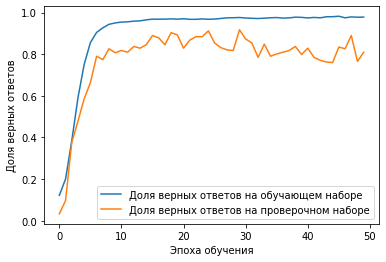

НЕЙРОНКА:  Embedding + LSTM

Аппендицит  распознано  81 % сеть считает, что это  Аппендицит ,  распознано ВЕРНО!
Гастрит  распознано  58 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Гепатит  распознано  50 % сеть считает, что это  Гепатит ,  распознано ВЕРНО!
Дуоденит  распознано  5 % сеть считает, что это  Энтерит ,  распознано НЕ ВЕРНО!
Колит  распознано  100 % сеть считает, что это  Колит ,  распознано ВЕРНО!
Панкреатит  распознано  100 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Холецестит  распознано  88 % сеть считает, что это  Холецестит ,  распознано ВЕРНО!
Эзофагит  распознано  0 % сеть считает, что это  Колит ,  распознано НЕ ВЕРНО!
Энтерит  распознано  100 % сеть считает, что это  Энтерит ,  распознано ВЕРНО!
Язва  распознано  76 % сеть считает, что это  Язва ,  распознано ВЕРНО!

Средний процент распознавания  80 %



In [ ]:
model = Sequential()
model.add(Embedding(maxWordsCount, 20, input_length=xLen))
model.add(SpatialDropout1D(0.4))
model.add(Conv1D(64,4, padding='same', activation='relu'))
model.add(Conv1D(64,4, padding='same', activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = RMSprop(lr=0.0005),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(xTrain, yTrain,
                    epochs=50,
                    batch_size=20,
                    validation_data=(xTest, yTest),
                    callbacks=[clb_save])

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(model, xTest10Classes, "Embedding + Conv1D")

In [ ]:
# загружаем модель с лучшей эпохи
model_itog = load_model('/content/drive/My Drive/Colab Notebooks/18. Рекуррентные сети/50xLen/callbacks_all/weights30.hdf5')
pred = recognizeMultiClass(model_itog, xTest10Classes, "Embedding + Conv1D")

НЕЙРОНКА:  Embedding + LSTM

Аппендицит  распознано  70 % сеть считает, что это  Аппендицит ,  распознано ВЕРНО!
Гастрит  распознано  75 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Гепатит  распознано  100 % сеть считает, что это  Гепатит ,  распознано ВЕРНО!
Дуоденит  распознано  55 % сеть считает, что это  Дуоденит ,  распознано ВЕРНО!
Колит  распознано  100 % сеть считает, что это  Колит ,  распознано ВЕРНО!
Панкреатит  распознано  100 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Холецестит  распознано  100 % сеть считает, что это  Холецестит ,  распознано ВЕРНО!
Эзофагит  распознано  0 % сеть считает, что это  Колит ,  распознано НЕ ВЕРНО!
Энтерит  распознано  97 % сеть считает, что это  Энтерит ,  распознано ВЕРНО!
Язва  распознано  100 % сеть считает, что это  Язва ,  распознано ВЕРНО!

Средний процент распознавания  91 %



## Bag of Words + Dense

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 1.9708 - accuracy: 0.3736 - val_loss: 2.1367 - val_accuracy: 0.5405
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.4725 - accuracy: 0.8053 - val_loss: 2.0049 - val_accuracy: 0.7297
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1.0764 - accuracy: 0.9223 - val_loss: 1.8180 - val_accuracy: 0.8243
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.9466 - val_loss: 1.5723 - val_accuracy: 0.9257
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.9623 - val_loss: 1.3536 - val_accuracy: 0.8986
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2106 - accuracy: 0.9851 - val_loss: 1.1485 - val_accuracy: 0.9257
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9992 - val_loss: 0.9650 - val_accuracy: 0.9189
Epoch 8/100


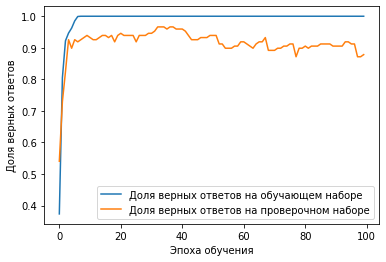

In [ ]:
model01 = Sequential()
model01.add(Dense(500, input_dim = maxWordsCount, activation='relu'))
model01.add(Dropout(0.4))
model01.add(BatchNormalization())
model01.add(Dense(200, activation='relu'))
model01.add(Dropout(0.45))
model01.add(BatchNormalization())
model01.add(Dense(50, activation='relu'))
model01.add(Dense(10, activation='sigmoid'))

model01.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=100,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
# на 49 эпохе точность была 96%. Когда пробовал BagOfWords еще не прикрутил callback с сохранением. Переделывать не стал.

## Уменьшаем xLen

In [ ]:
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 30
step = 2

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)

xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

Epoch 1/100
26/26 [==============================] - 0s 15ms/step - loss: 1.8053 - accuracy: 0.5040 - val_loss: 2.0388 - val_accuracy: 0.6234
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 1.0027 - accuracy: 0.8800 - val_loss: 1.6471 - val_accuracy: 0.7641
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.3396 - accuracy: 0.9838 - val_loss: 1.2160 - val_accuracy: 0.7857
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 0.0720 - accuracy: 0.9991 - val_loss: 0.9310 - val_accuracy: 0.7792
Epoch 5/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.9997 - val_loss: 0.8553 - val_accuracy: 0.7662
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.8190 - val_accuracy: 0.7835
Epoch 7/100
26/26 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.8037 - val_accuracy: 0.8052
Epoch 8/100


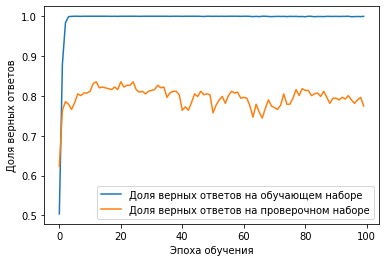

In [ ]:
# максимум, которого удалось добиться с 30 словами  - 83-84%. Хоть при текущей модели видно переобучение, но с дропаутами и нормализацией все равно не получилось достичь лучшего результата
model01 = Sequential()
model01.add(Dense(500, input_dim = maxWordsCount, activation='relu'))
model01.add(Dropout(0.4))
model01.add(BatchNormalization())
model01.add(Dense(200, activation='relu'))
model01.add(Dropout(0.45))
model01.add(BatchNormalization())
model01.add(Dense(50, activation='relu'))
# model01.add(Dropout(0.6))
# model01.add(BatchNormalization())

model01.add(Dense(10, activation='sigmoid'))

model01.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=100,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()